### The ``MNIST`` dataset - Functional API
Classifying hand written digits using the `MNIST` dataset and the Functional API in keras.

### Imports

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

> Loading the `data`.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
> Let's visualise some of the `images` 

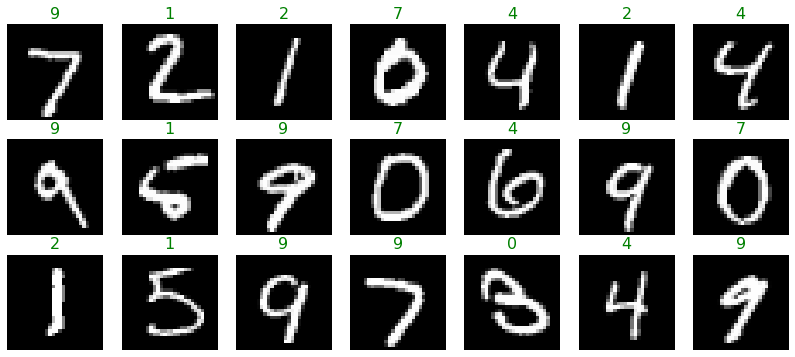

In [10]:
def plot_images(images_and_classes, labels_true, cols=7):
  rows = 3
  fig = plt.figure()
  fig.set_size_inches(cols * 2, rows * 2)
  for i, (image, label_true) in enumerate(zip(images_and_classes, labels_true)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap="gray")
    plt.title(labels_true[label_true], color ='g', fontsize=16 )

plot_images(X_test[:21], y_test[:21])

> Creating a Functional `model`.

In [53]:
input_layer = keras.layers.Input(shape=(28, 28), name="input_layer")
flatten_layer = keras.layers.Flatten(name='flatten_layer')(input_layer)
hl_1 = keras.layers.Dense(128, activation='relu', name="hidden_layer_1")(flatten_layer)
hl_2 = keras.layers.Dense(64, activation='relu', name="hidden_layer_2")(hl_1)
output_layer = keras.layers.Dense(10, activation='softmax', name="output_layer")(hl_2)
model = keras.Model(inputs=input_layer, outputs=output_layer, name="mnist_digit_classifier")
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer = 'adam',
    metrics = ['acc']
)
model.summary()

Model: "mnist_digit_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28)]          0         
_________________________________________________________________
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                8256      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [54]:
EPOCHS = 30
VALID_SPLIT = .2
BATCH_SIZE = 32
VERBOSE = 1

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) )
early_stopping = keras.callbacks.EarlyStopping(
    verbose =0,
    patience = 3,
    monitor= 'val_loss'
)
history = model.fit(X_train, y_train, epochs=EPOCHS,
         callbacks =[early_stopping],
         verbose=VERBOSE, validation_split= VALID_SPLIT,
         batch_size=BATCH_SIZE
         )

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 5.1156 - acc: 0.8073 - val_loss: 0.4963 - val_acc: 0.9012
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3832 - acc: 0.9157 - val_loss: 0.2771 - val_acc: 0.9322
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2119 - acc: 0.9446 - val_loss: 0.2470 - val_acc: 0.9415
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1823 - acc: 0.9506 - val_loss: 0.2020 - val_acc: 0.9470
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1499 - acc: 0.9567 - val_loss: 0.1921 - val_acc: 0.9547
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1343 - acc: 0.9641 - val_loss: 0.1897 - val_acc: 0.9492
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1123 - acc: 0.9679 - val_loss: 0.1532 - val_acc: 0.9635
Epoch 8/30
1500/1500 [==============================] - 4s 3ms

> Plotting the trainning `history`.

In [48]:
import pandas as pd

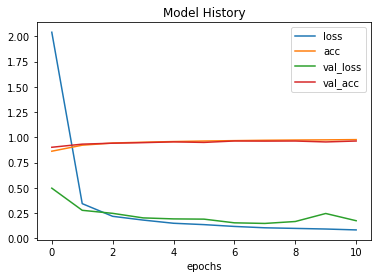

In [56]:
pd.DataFrame(history.history).plot(xlabel='epochs', title="Model History")
plt.show()

> Evaluating `model`.

In [55]:
model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.1468 - acc: 0.9659


[0.14675487577915192, 0.9659000039100647]

> Making ``predictions``

In [65]:
predictions = np.argmax(model.predict(X_test), axis=1)
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [66]:
class_names = np.arange(10)
class_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

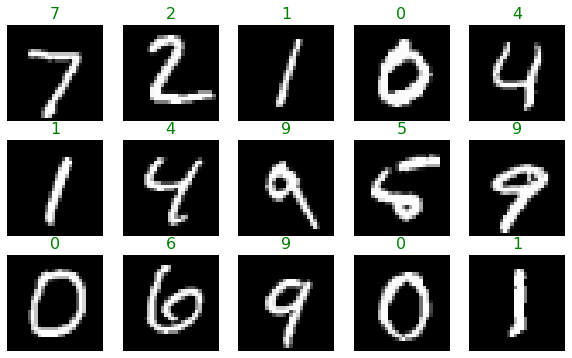

In [68]:
def plot_predictions_images(images_and_classes, labels_true, labels_pred, cols=5):
  rows = 3
  fig = plt.figure()
  fig.set_size_inches(cols * 2, rows * 2)
  for i, (image, label_true, label_pred) in enumerate(zip(images_and_classes, labels_true, labels_pred)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')
    plt.title(class_names[label_true], color ='g' if label_true == label_pred else 'r', fontsize=16 )

plot_predictions_images(X_test[:15], y_test[:15], predictions[:15])

> `wow` the model is getting all the digits correct now let's plot the ``confusion matrix``.

In [70]:
import itertools
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=16): 
      # Create the confustion matrix
      cm = confusion_matrix(y_true, y_pred)
      cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
      n_classes = cm.shape[0]
      # Plot the figure and make it pretty
      fig, ax = plt.subplots(figsize=figsize)
      cax = ax.matshow(cm, cmap=plt.cm.Blues) 
      fig.colorbar(cax)
    
      if classes:
        labels = classes
      else:
        labels = np.arange(cm.shape[0])
        
      ax.set(title="Confusion Matrix",
             xlabel="Predicted label",
             ylabel="True label",
             xticks=np.arange(n_classes),
             yticks=np.arange(n_classes), 
             xticklabels=labels,
             yticklabels=labels)

      ax.xaxis.set_label_position("bottom")
      ax.xaxis.tick_bottom()

      threshold = (cm.max() + cm.min()) / 2.
      # Plot the text on each cell
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

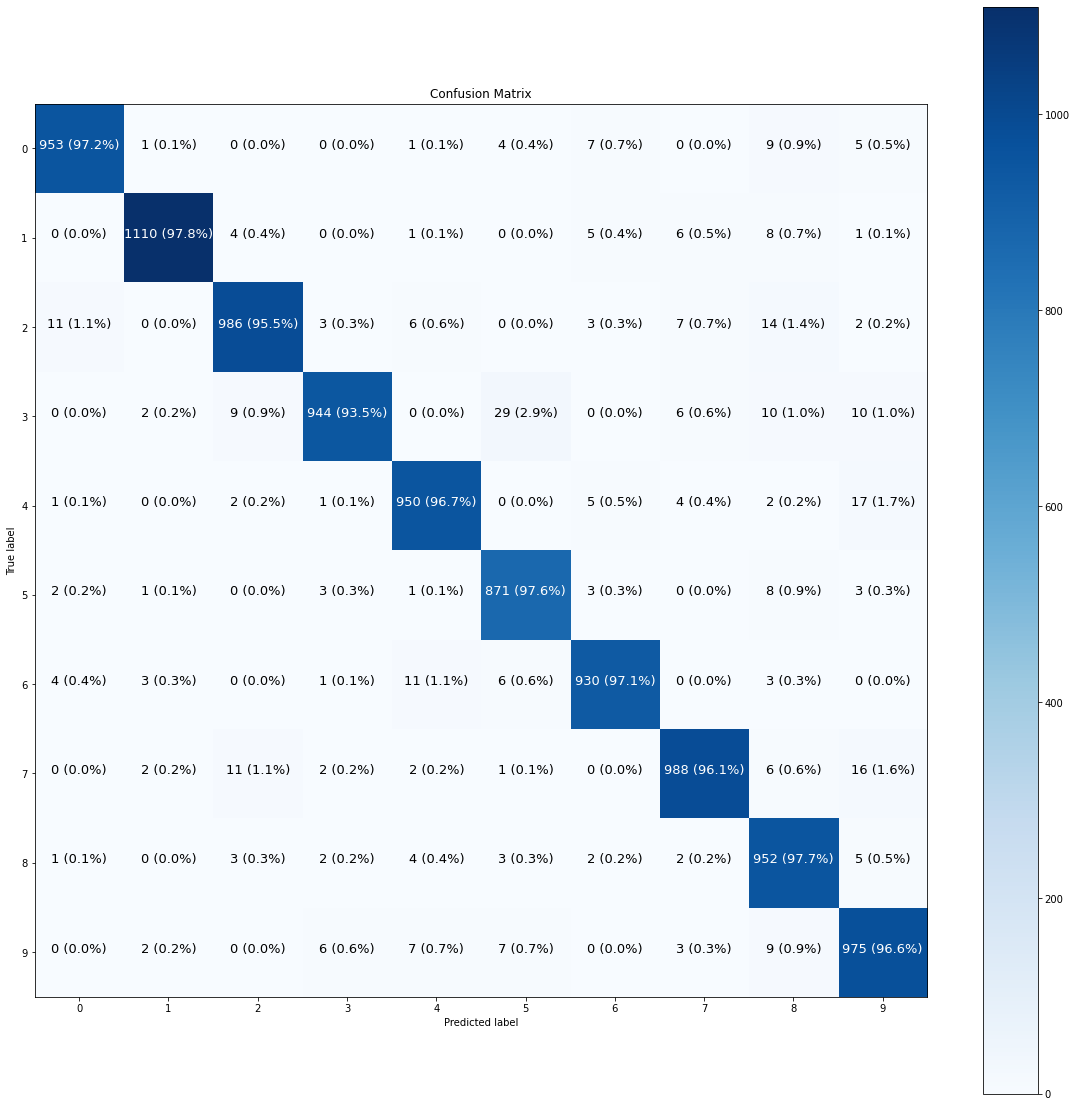

In [80]:
plot_confusion_matrix(y_test,predictions, list(class_names), figsize=(20,20), text_size=13 )

> That's more of it about the `Functional` API in `Keras.`
